In [7]:
!pip install transformers


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [9]:
#--------------------------------------------------------------------------------------
# results = []

# # Load your CSV
# df = pd.read_csv("filtered_dataset.csv")  # replace with your filename

# # Create the sentiment analysis pipeline
# pipe = pipeline(
#     "sentiment-analysis",
#     model="StephanAkkerman/FinTwitBERT-sentiment",
#     device=0 
# )

# # Pass each tweet into the pipeline
# tweets = df['tweet'].dropna().tolist() 

# for tweet in tweets:
#     result = pipe(tweet)
#     label = result[0]['label']
#     score = result[0]['score']
#     results.append((tweet, label, score))

# # Create a DataFrame
# results_df = pd.DataFrame(results, columns=["tweet", "predicted_label", "confidence_score"])

# # Save it
# results_df.to_csv("predicted_tweet_sentiments.csv", index=False)
#------------------------------------------------------------------------------------------


In [ ]:
# results = []

# # Load your CSV
# df = pd.read_csv("filtered_dataset.csv")  # replace with your filename

# # Create the sentiment analysis pipeline with base FinTwitBERT (not fine-tuned)
# tokenizer = AutoTokenizer.from_pretrained("StephanAkkerman/FinTwitBERT")
# model = AutoModelForSequenceClassification.from_pretrained("StephanAkkerman/FinTwitBERT", num_labels=3)

# pipe = pipeline(
#     "sentiment-analysis",
#     model=model,
#     tokenizer=tokenizer,
#     return_all_scores=True,
#     device=0  # use -1 for CPU, 0 for GPU
# )

# # Pass each tweet into the pipeline
# tweets = df['tweet'].dropna().tolist()

# label_map = {
#     "LABEL_0": "NEUTRAL",
#     "LABEL_1": "BULLISH",
#     "LABEL_2": "BULLISH"
# }

# for tweet in tweets:
#     result = pipe(tweet)[0]
#     label = result[0]['label']
#     score = result[0]['score']
#     label_name = label_map.get(label, "unknown")
#     results.append((tweet, label_name, score))

# # Create a DataFrame
# results_df = pd.DataFrame(results, columns=["tweet", "predicted_label", "confidence_score"])

# # Save it
# results_df.to_csv("predicted_tweet_bert.csv", index=False)
# #--------------------------------------------------------------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at StephanAkkerman/FinTwitBERT and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/eecs738/lib/python3.8/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Results Sentiment Vs Original

Accuracy: 95.73%


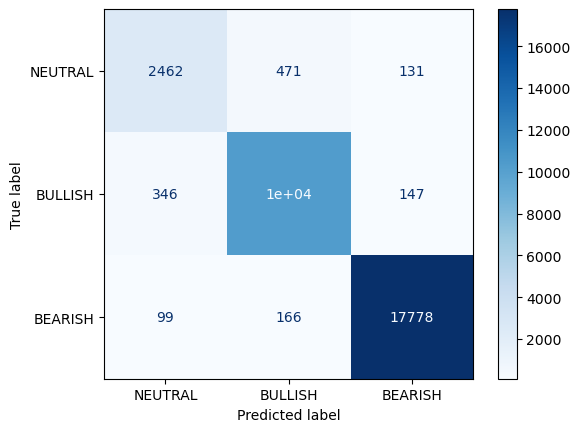

In [10]:
actual_df = pd.read_csv("filtered_dataset.csv")
predicted_df = pd.read_csv("predicted_tweet_sentiments.csv")

merged_df = pd.merge(actual_df, predicted_df, on="tweet")

del actual_df, predicted_df

# Map predicted text labels (BEARISH, BULLISH, NEUTRAL) to numbers
def map_predicted(label):
    if label.upper() == "BULLISH":
        return 1
    elif label.upper() == "NEUTRAL":
        return 0
    elif label.upper() == "BEARISH":
        return 2
    else:
        return -1

merged_df['predicted_mapped'] = merged_df['predicted_label'].apply(map_predicted)

# Add a "Correct" column
merged_df['correct'] = merged_df['sentiment'] == merged_df['predicted_mapped']

merged_df.to_csv("1.results_ sentVSOriginal.csv", index=False)

# Calculate Accuracy
accuracy = accuracy_score(merged_df['sentiment'], merged_df['predicted_mapped'])
print(f"Accuracy: {accuracy*100:.2f}%")

cm = confusion_matrix(merged_df['sentiment'], merged_df['predicted_mapped'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NEUTRAL", "BULLISH", "BEARISH"])
disp.plot(cmap="Blues")

Results Bert Vs Original

Accuracy: 9.61%


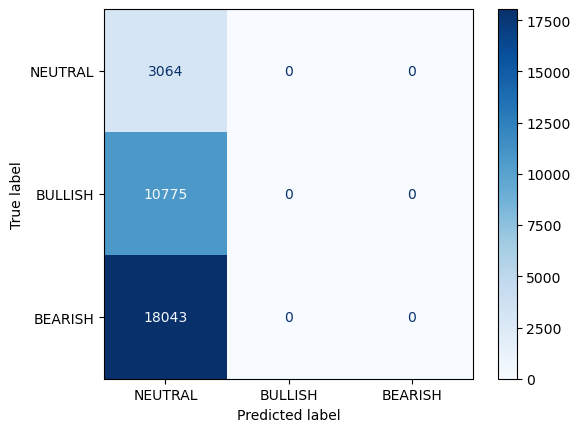

In [8]:
actual_df = pd.read_csv("filtered_dataset.csv")
predicted_df = pd.read_csv("predicted_tweet_Bert.csv")

merged_df = pd.merge(actual_df, predicted_df, on="tweet")

del actual_df, predicted_df

# Map predicted text labels (BEARISH, BULLISH, NEUTRAL) to numbers
def map_predicted(label):
    if label.upper() == "BULLISH":
        return 1
    elif label.upper() == "NEUTRAL":
        return 0
    elif label.upper() == "BEARISH":
        return 2
    else:
        return -1

merged_df['predicted_mapped'] = merged_df['predicted_label'].apply(map_predicted)

# Add a "Correct" column
merged_df['correct'] = merged_df['sentiment'] == merged_df['predicted_mapped']

merged_df.to_csv("results2_BertVSOriginal.csv", index=False)

# Calculate Accuracy
accuracy = accuracy_score(merged_df['sentiment'], merged_df['predicted_mapped'])
print(f"Accuracy: {accuracy*100:.2f}%")

cm = confusion_matrix(merged_df['sentiment'], merged_df['predicted_mapped'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NEUTRAL", "BULLISH", "BEARISH"])
disp.plot(cmap="Blues")


Results Bert Vs Sentiment

Accuracy: 9.12%


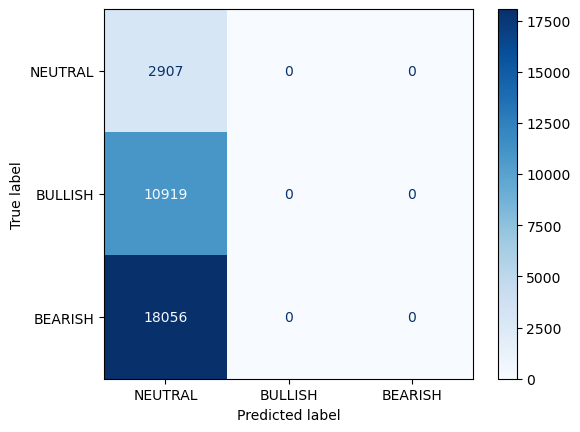

In [11]:
actual_df = pd.read_csv("predicted_tweet_sentiments.csv")
predicted_df = pd.read_csv("predicted_tweet_Bert.csv")

merged_df = pd.merge(actual_df, predicted_df, on="tweet")

del actual_df, predicted_df

# Map predicted text labels (BEARISH, BULLISH, NEUTRAL) to numbers
def map_predicted(label):
    if label.upper() == "BULLISH":
        return 1
    elif label.upper() == "NEUTRAL":
        return 0
    elif label.upper() == "BEARISH":
        return 2
    else:
        return -1

merged_df['predicted_mapped_sent'] = merged_df['predicted_label_x'].apply(map_predicted)
merged_df['predicted_mapped_bert'] = merged_df['predicted_label_y'].apply(map_predicted)

# Add a "Correct" column
merged_df['correct'] = merged_df['predicted_mapped_sent'] == merged_df['predicted_mapped_bert']

merged_df.to_csv("results2_BertVSSent.csv", index=False)

# Calculate Accuracy
accuracy = accuracy_score(merged_df['predicted_mapped_sent'], merged_df['predicted_mapped_bert'])
print(f"Accuracy: {accuracy*100:.2f}%")

cm = confusion_matrix(merged_df['predicted_mapped_sent'], merged_df['predicted_mapped_bert'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NEUTRAL", "BULLISH", "BEARISH"])
disp.plot(cmap="Blues")
